In [2]:
import torch
import numpy as np
from IPython.display import Image

## 1. 基础回顾

$$
\begin{split}
&y=f(x)=6x^2+2x+4\\
&\frac{dy}{dx}=12x+2
\end{split}
$$

In [3]:
x = torch.tensor(3., requires_grad=True)

In [4]:
print(x.data)
print(x.grad)
print(x.is_leaf)
print(x.requires_grad)

tensor(3.)
None
True
True


In [5]:
y = 6*x**2 + 2*x + 4

In [6]:
print(y.data)
print(y.grad)
print(y.is_leaf)
print(y.requires_grad)

tensor(64.)
None
False
True


/Users/chunhuizhang/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:485.)
  


In [7]:
y.backward()

In [8]:
print(x.data)
print(x.grad)
print(x.is_leaf)
print(x.requires_grad)

tensor(3.)
tensor(38.)
True
True


In [9]:
print(y.data)
print(y.grad)
print(y.is_leaf)
print(y.requires_grad)

tensor(64.)
None
False
True


/Users/chunhuizhang/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:485.)
  


## 2. partial derivaties

$$
\begin{split}
&f(u, v)=u^3+v^2+4uv\\
&\frac{\partial f}{\partial u}=3u^2+4v\\
&\frac{\partial f}{\partial v}=2v+4u
\end{split}
$$

In [10]:
u = torch.tensor(3., requires_grad=True)
v = torch.tensor(4., requires_grad=True)

In [11]:
f = u**3 + v**2 + 4*u*v

In [12]:
f.backward()

In [13]:
u.grad

tensor(43.)

In [14]:
v.grad

tensor(20.)

## 3. 计算图（computation graph）

$$
L=f(g(h(x)))
$$

In [15]:
import torch 

a = torch.randn((3,3), requires_grad = True)

w1 = torch.randn((3,3), requires_grad = True)
w2 = torch.randn((3,3), requires_grad = True)
w3 = torch.randn((3,3), requires_grad = True)
w4 = torch.randn((3,3), requires_grad = True)

# b: 3*3
b = w1*a
# c: 3*3 
c = w2*a

d = w3*b + w4*c 

L = (10 - d)

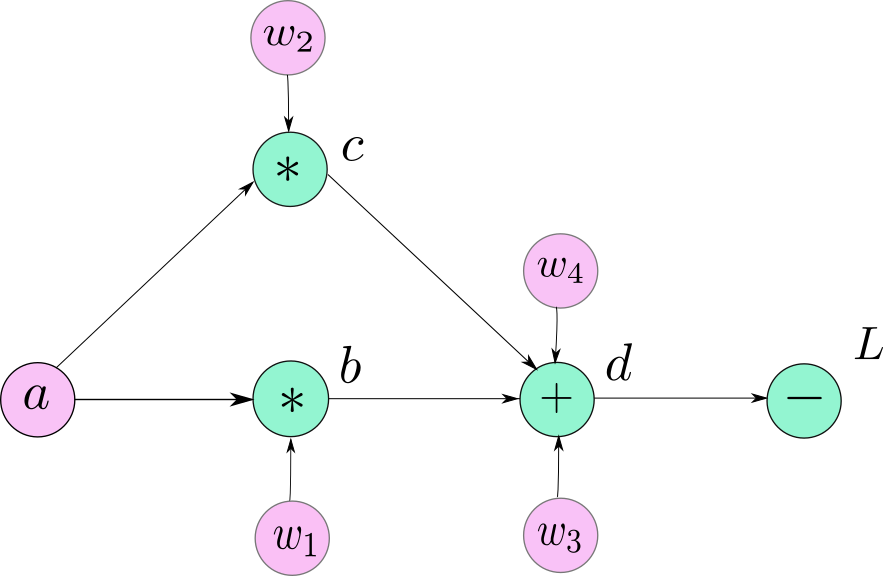

In [41]:
Image('./imgs/comp_graph.PNG')

In [16]:
a.is_leaf

True

In [17]:
w1.is_leaf

True

In [18]:
w4.is_leaf

True

In [20]:
L

tensor([[11.6027,  9.5202,  9.5188],
        [ 9.6397, 10.4312, 10.2627],
        [ 9.5411, 10.0712, 10.2101]], grad_fn=<RsubBackward1>)

In [19]:
L.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [21]:
import torch 

a = torch.randn((3,3), requires_grad = True)

w1 = torch.randn((3,3), requires_grad = True)
w2 = torch.randn((3,3), requires_grad = True)
w3 = torch.randn((3,3), requires_grad = True)
w4 = torch.randn((3,3), requires_grad = True)

# b: 3*3
b = w1*a
# c: 3*3 
c = w2*a

d = w3*b + w4*c 
d.retain_grad()
L = (10 - d).sum()

In [22]:
L

tensor(89.2221, grad_fn=<SumBackward0>)

In [23]:
L.backward()

In [24]:
a.grad

tensor([[-1.0138, -0.1304, -0.0858],
        [ 0.7689,  0.0097, -0.0731],
        [ 0.6819,  0.8873, -0.4642]])

$$
\begin{split}
\frac{\partial L}{\partial a}&=\frac{\partial L}{\partial d}\left(\frac{\partial d}{\partial b}\frac{\partial b}{\partial a} + \frac{\partial d}{\partial c}\frac{\partial c}{\partial a}\right)\\
&=\frac{\partial L}{\partial d}\frac{\partial d}{\partial b}\frac{\partial b}{\partial a}+\frac{\partial L}{\partial d}\frac{\partial d}{\partial c}\frac{\partial c}{\partial a}\\
&=(-1)\cdot w_3\cdot w_1+(-1)\cdot w_4\cdot w_2
\end{split}
$$

In [25]:
-w3*w1-w4*w2

tensor([[-1.0138, -0.1304, -0.0858],
        [ 0.7689,  0.0097, -0.0731],
        [ 0.6819,  0.8873, -0.4642]], grad_fn=<SubBackward0>)

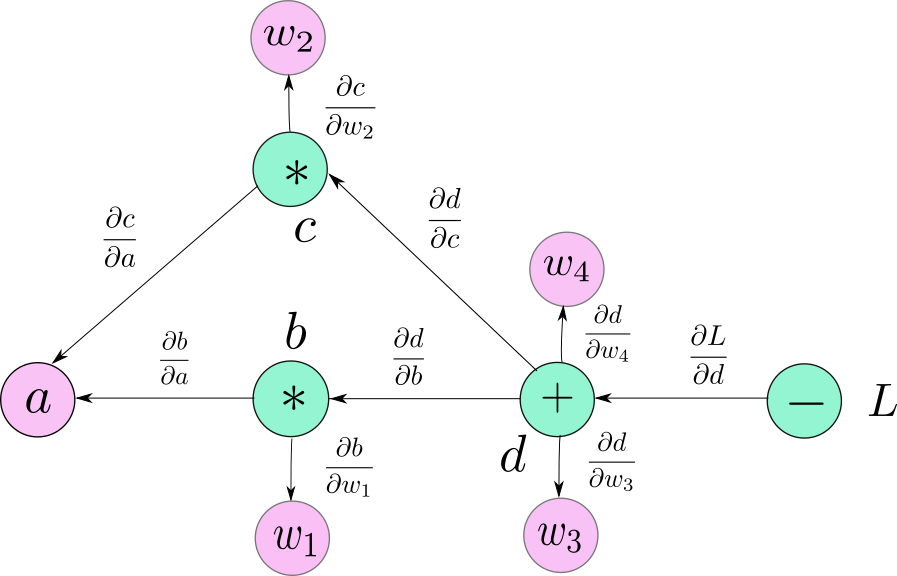

In [61]:
Image('./imgs/comp_graph_grad.PNG')